In [1]:
#Import all the libraries we use
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import contextily as ctx
import pathlib
import os

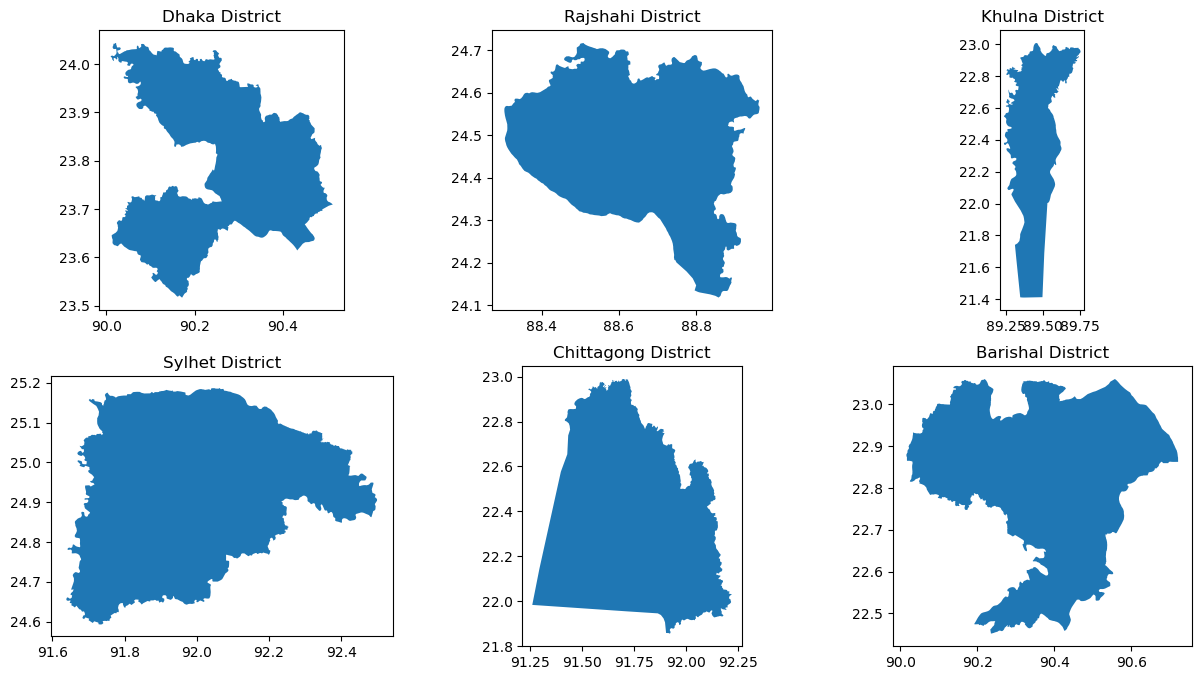

In [2]:
cities = ['Dhaka District', 
          'Rajshahi District', 
          'Khulna District', 
          'Sylhet District', 
          'Chittagong District',
          'Barishal District']

f, ax = plt.subplots(2,3,figsize=(15,8))
indicies = [(i, j) for i in range(2) for j in range(3)]

for idx, city in enumerate(cities):
    bx = ax[indicies[idx]]
    admin = ox.geocode_to_gdf(city)
    admin.plot(ax=bx)
    bx.set_title(city)


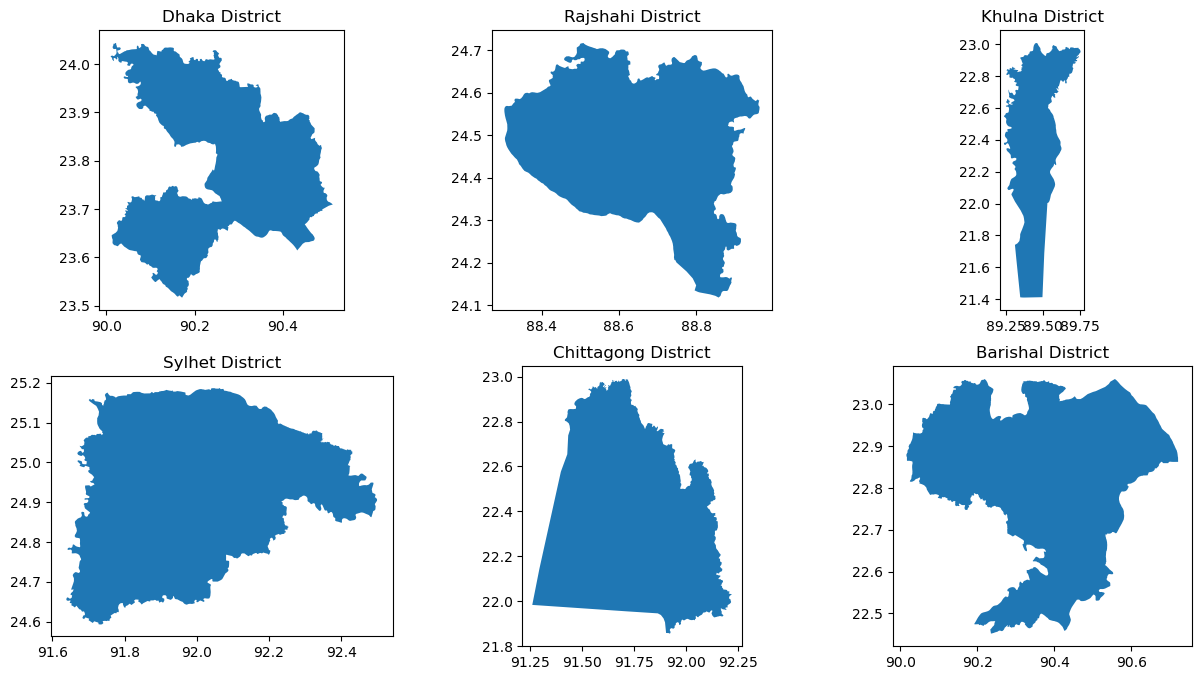

In [3]:
f, ax = plt.subplots(2,3,figsize=(15,8))

cities_admins = {}

for idx, city in enumerate(cities):
    bx = ax[indicies[idx]]
    admin = ox.geocode_to_gdf(city)
    admin.plot(ax=bx)
    bx.set_title(city)
    cities_admins[city] = admin

In [4]:
city_edges = {}

for city, admin in cities_admins.items():
    G = ox.graph_from_polygon(admin.geometry.to_list()[0], network_type = 'drive')
    nodes, edges = ox.graph_to_gdfs(G)
    print(city, 'number of nodes: ', len(nodes), '   number of edges: ', len(edges))
    city_edges[city] = edges

Dhaka District number of nodes:  49989    number of edges:  127882
Rajshahi District number of nodes:  6980    number of edges:  17356
Khulna District number of nodes:  7303    number of edges:  18311
Sylhet District number of nodes:  30766    number of edges:  76146
Chittagong District number of nodes:  29293    number of edges:  68841
Barishal District number of nodes:  3640    number of edges:  9039


In [5]:
city_name = ['Dhaka','Rajshahi','Khulna','Sylhet','Chittagong','Barishal']

In [11]:
color_palette = [{"Neon": "#FF6EC7",  "Background": "#2E0854"},
                 {"Neon": "#39FF14",  "Background": "#001F3F"},
                 {"Neon": "#00ccff",  "Background": "#002233"},
                 {"Neon": "#FFFF00",  "Background": "#333333"},
                 {"Neon": "#4D4DFF",  "Background": "#000000"},
                 {"Neon": "#BC13FE",  "Background": "#0B3B0B"}
]

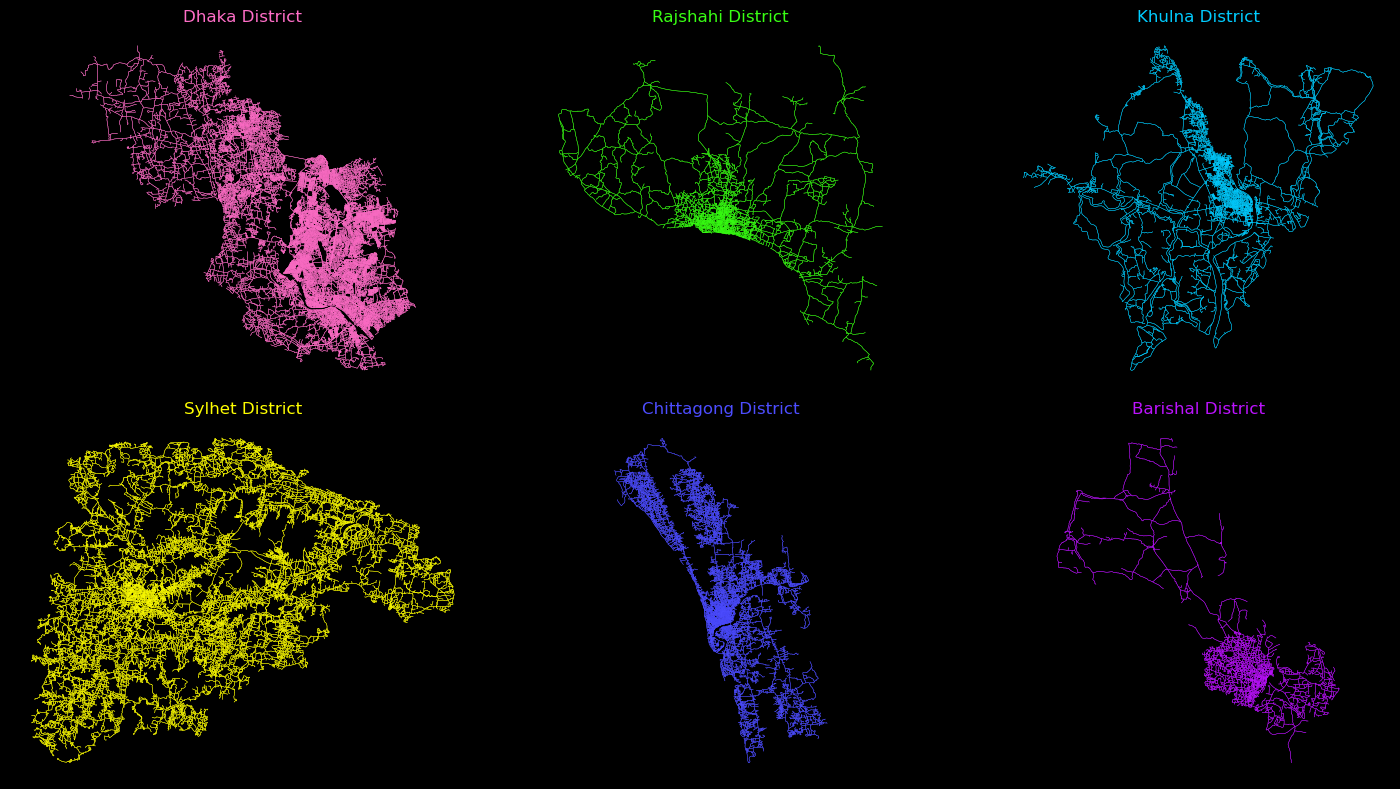

In [26]:
f, ax = plt.subplots(2,3,figsize=(15,8))
for idx, (city, edges) in enumerate(city_edges.items()):
    bx = ax[indicies[idx]]
    neon = color_palette[idx]['Neon']
    edges.plot(ax = bx, color = neon, linewidth = 0.3)
    
    
    bx.set_title(city,color = neon)
    bx.axis('off')
f.patch.set_facecolor('black')
NOTEBOOK_PATH = pathlib.Path().resolve()
Map = NOTEBOOK_PATH / "../Map" 

figure_path = os.path.join(Map,'roads')
plt.tight_layout()
plt.savefig(figure_path, dpi=300) #define the size

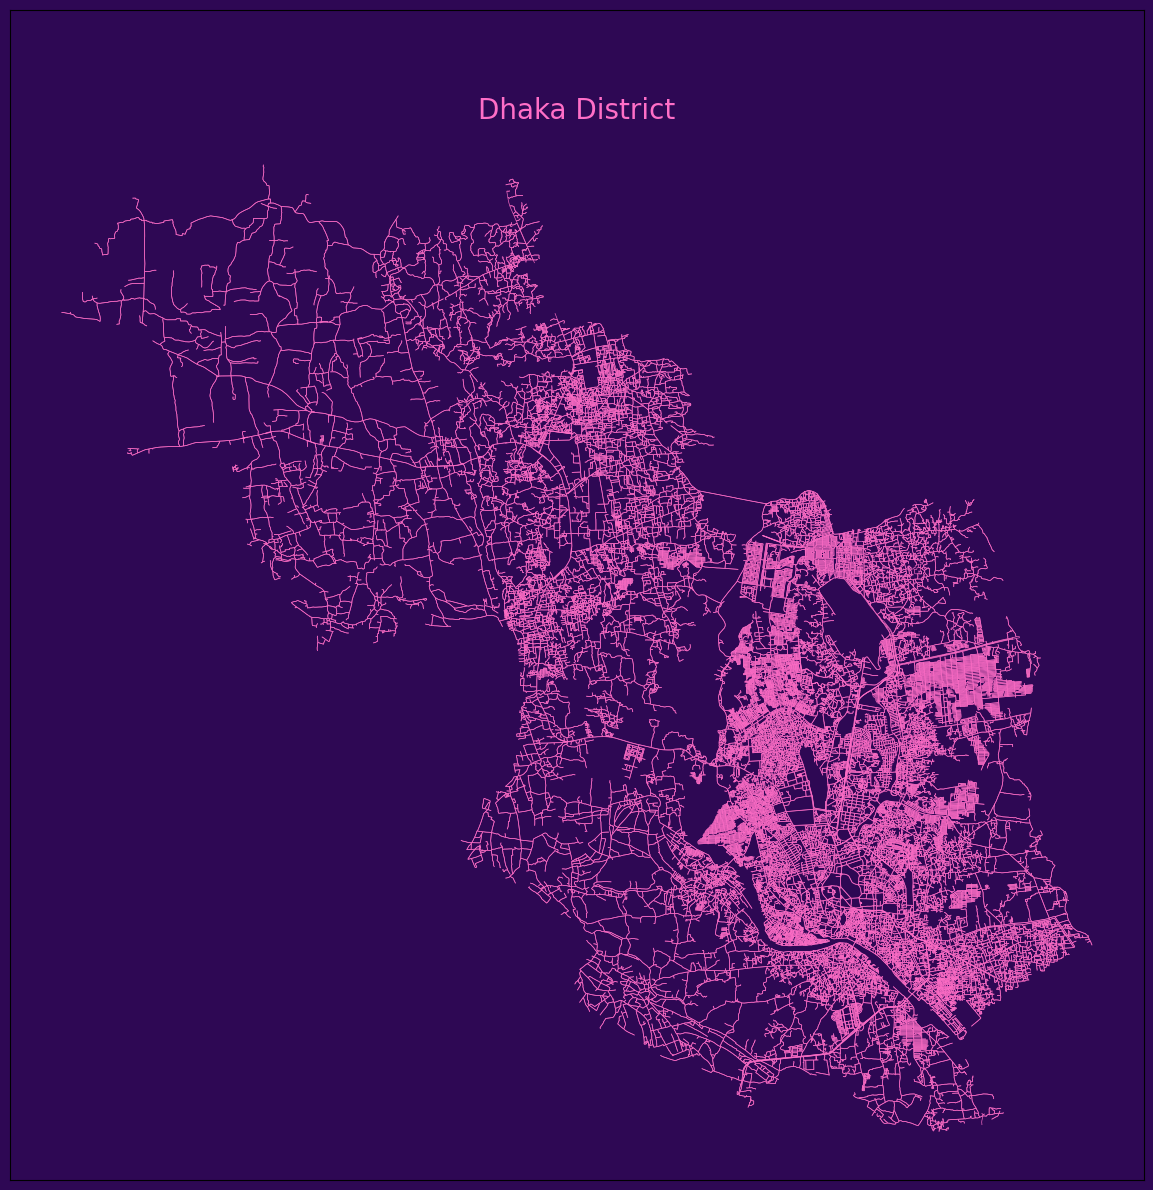

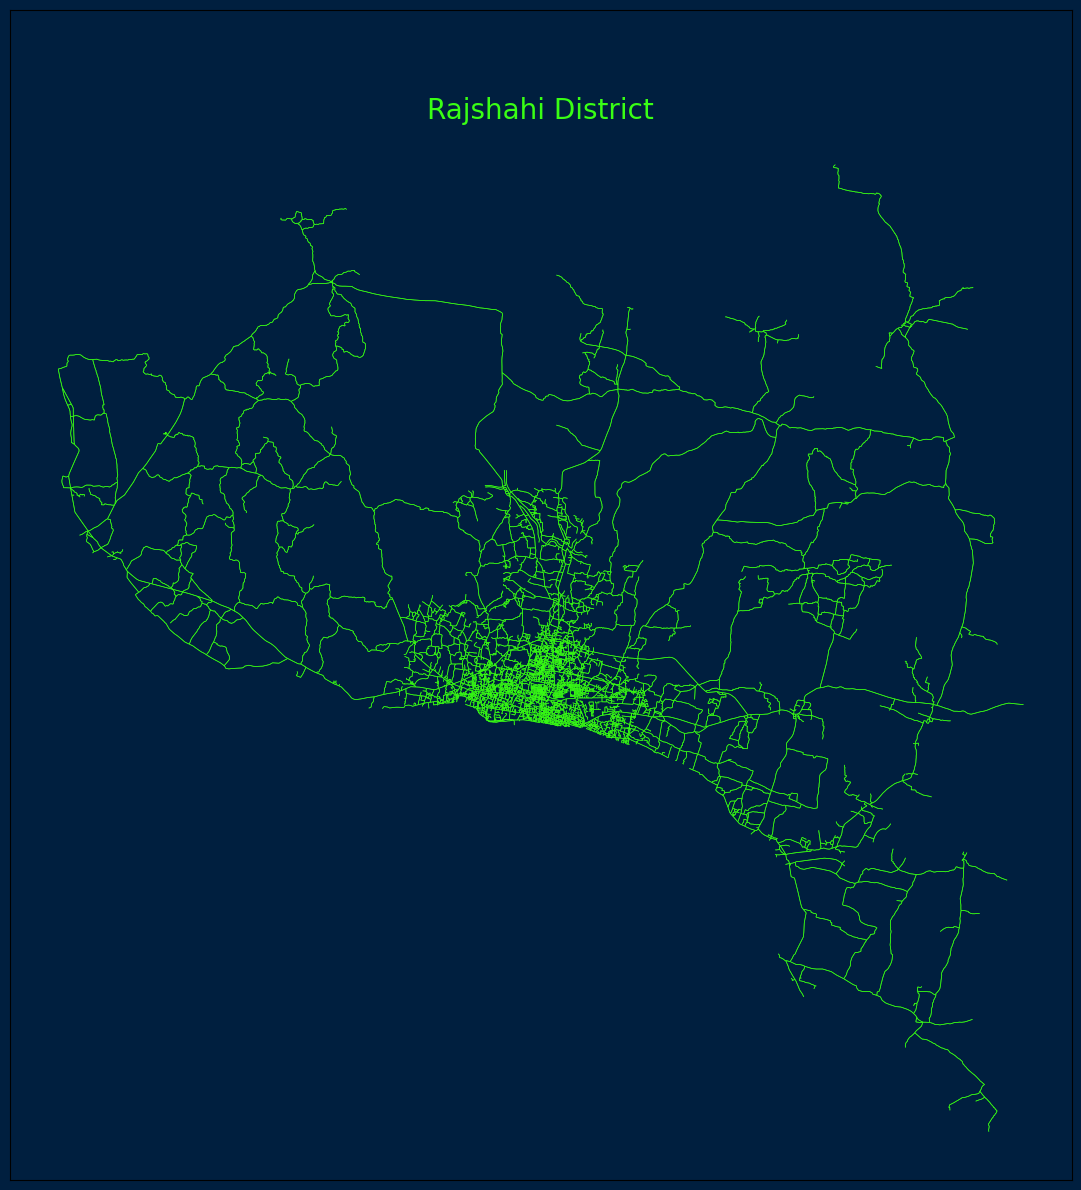

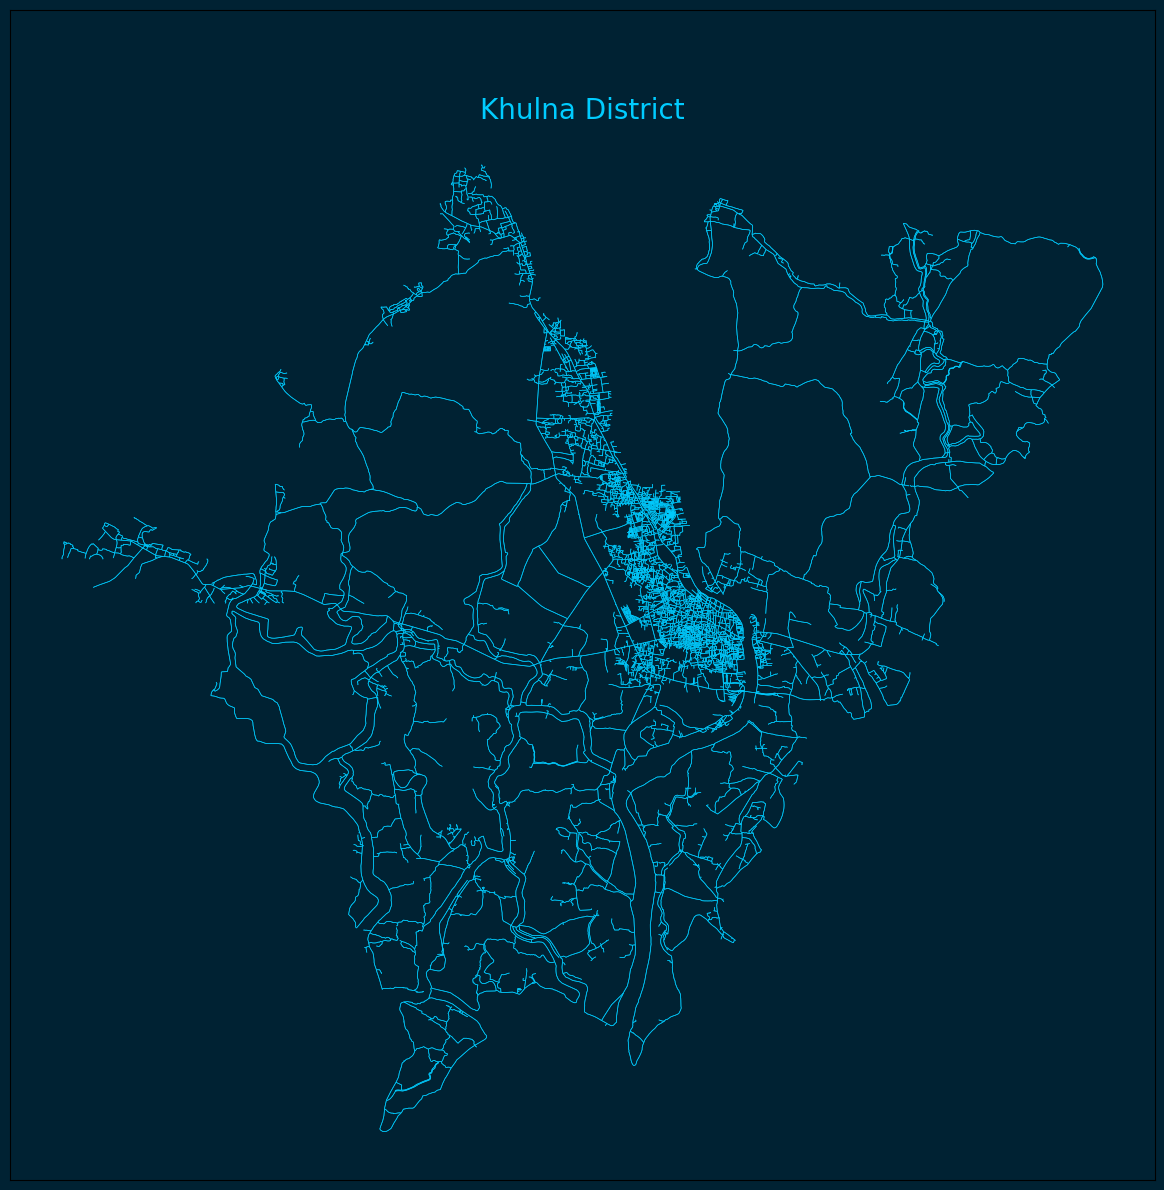

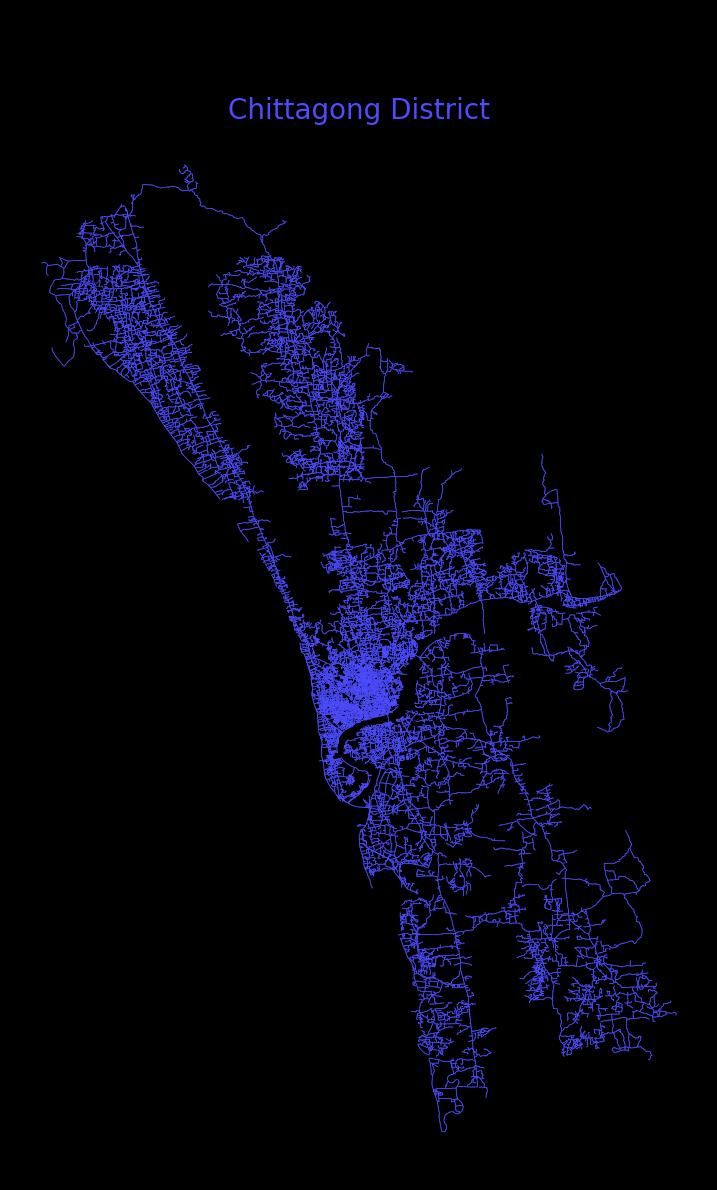

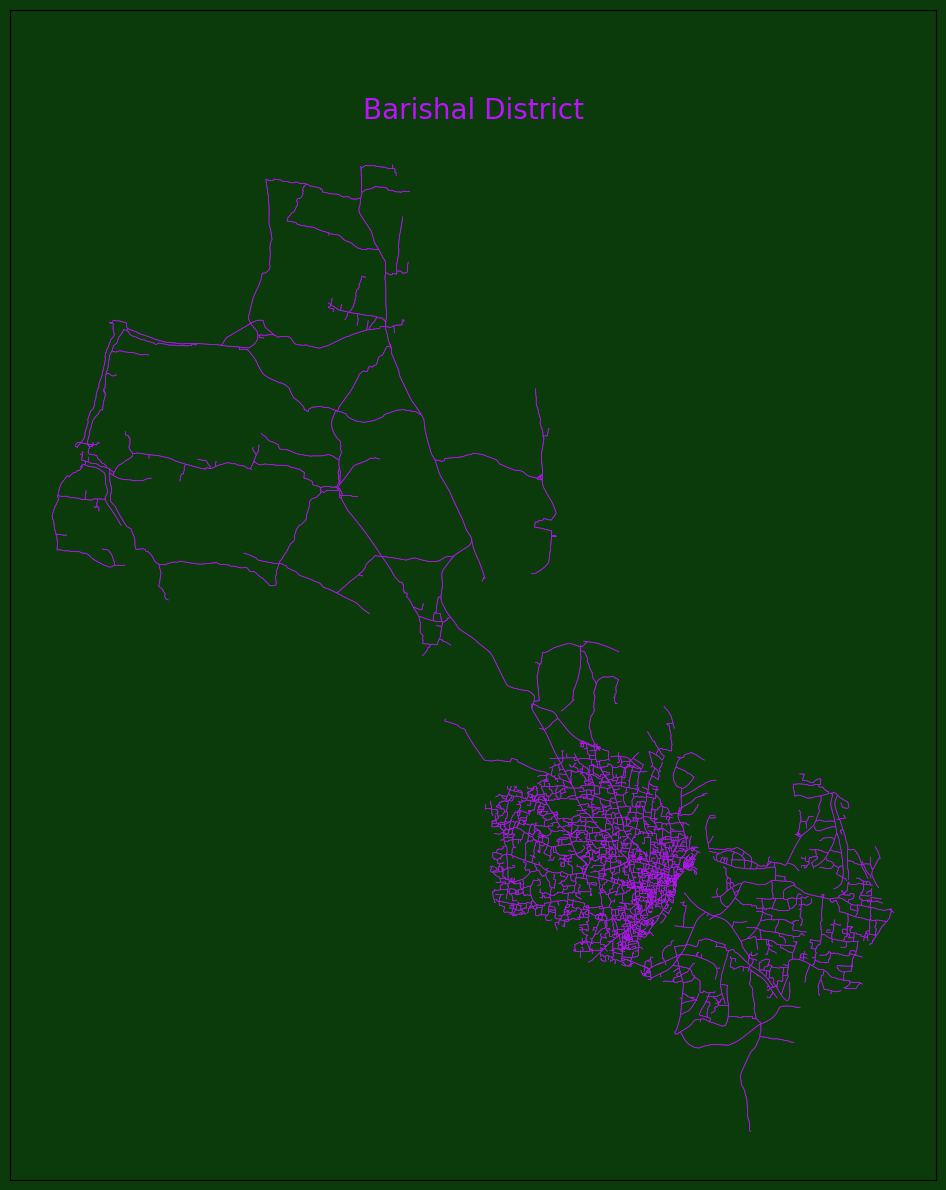

In [27]:
# visualize networks
for idx, (city, edges) in enumerate(city_edges.items()):   
    
    # set the plot paramts
    neon = color_palette[idx]['Neon']
    color_bcg  = color_palette[idx]['Background']
    width = 0.5

    # do the plot
    f, ax = plt.subplots(1,1,figsize=(12,12))
    edges.plot(ax = ax, color = neon, linewidth = width, alpha = 0.9)

    # get rid of the ticks
    for xlabel_i in ax.get_xticklabels(): xlabel_i.set_visible(False)
    for ylabel_i in ax.get_yticklabels(): ylabel_i.set_visible(False)
    for tick in ax.get_xticklines(): tick.set_visible(False)
    for tick in ax.get_yticklines(): tick.set_visible(False)
    f.patch.set_facecolor(color_bcg)

# Set the axes background color to black
    ax.set_facecolor(color_bcg)
    # add the title
    ymin, ymax = plt.ylim()
    extension = 0.1 * (ymax - ymin)
    ax.set_ylim(ymin, ymax + extension)
    ax.set_title(city, fontsize = 20, color = neon, y = 0.9)
    bx.axis('off')
    NOTEBOOK_PATH = pathlib.Path().resolve()
    Map = NOTEBOOK_PATH / "../Map" 

    figure_path = os.path.join(Map, city)
    plt.tight_layout()
    plt.savefig(figure_path, dpi=300) #define the size